In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from collections import Counter

In [5]:
data = pd.read_csv('../dataset/heart.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
y = data['target']
X = data.drop(['target'], axis=1)

In [8]:
data.shape

(303, 14)

In [9]:
Counter(y)

Counter({1: 165, 0: 138})

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=666,
                                                    stratify=y)

In [11]:
dtree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_jobs=-1)
ada_boost = AdaBoostClassifier()

In [12]:
%%time
dtree.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 8.56 ms


DecisionTreeClassifier()

In [13]:
%%time
rand_forest.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 173 ms


RandomForestClassifier(n_jobs=-1)

In [14]:
%%time
ada_boost.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 84.1 ms


AdaBoostClassifier()

In [15]:
features = list(X_train.columns)
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

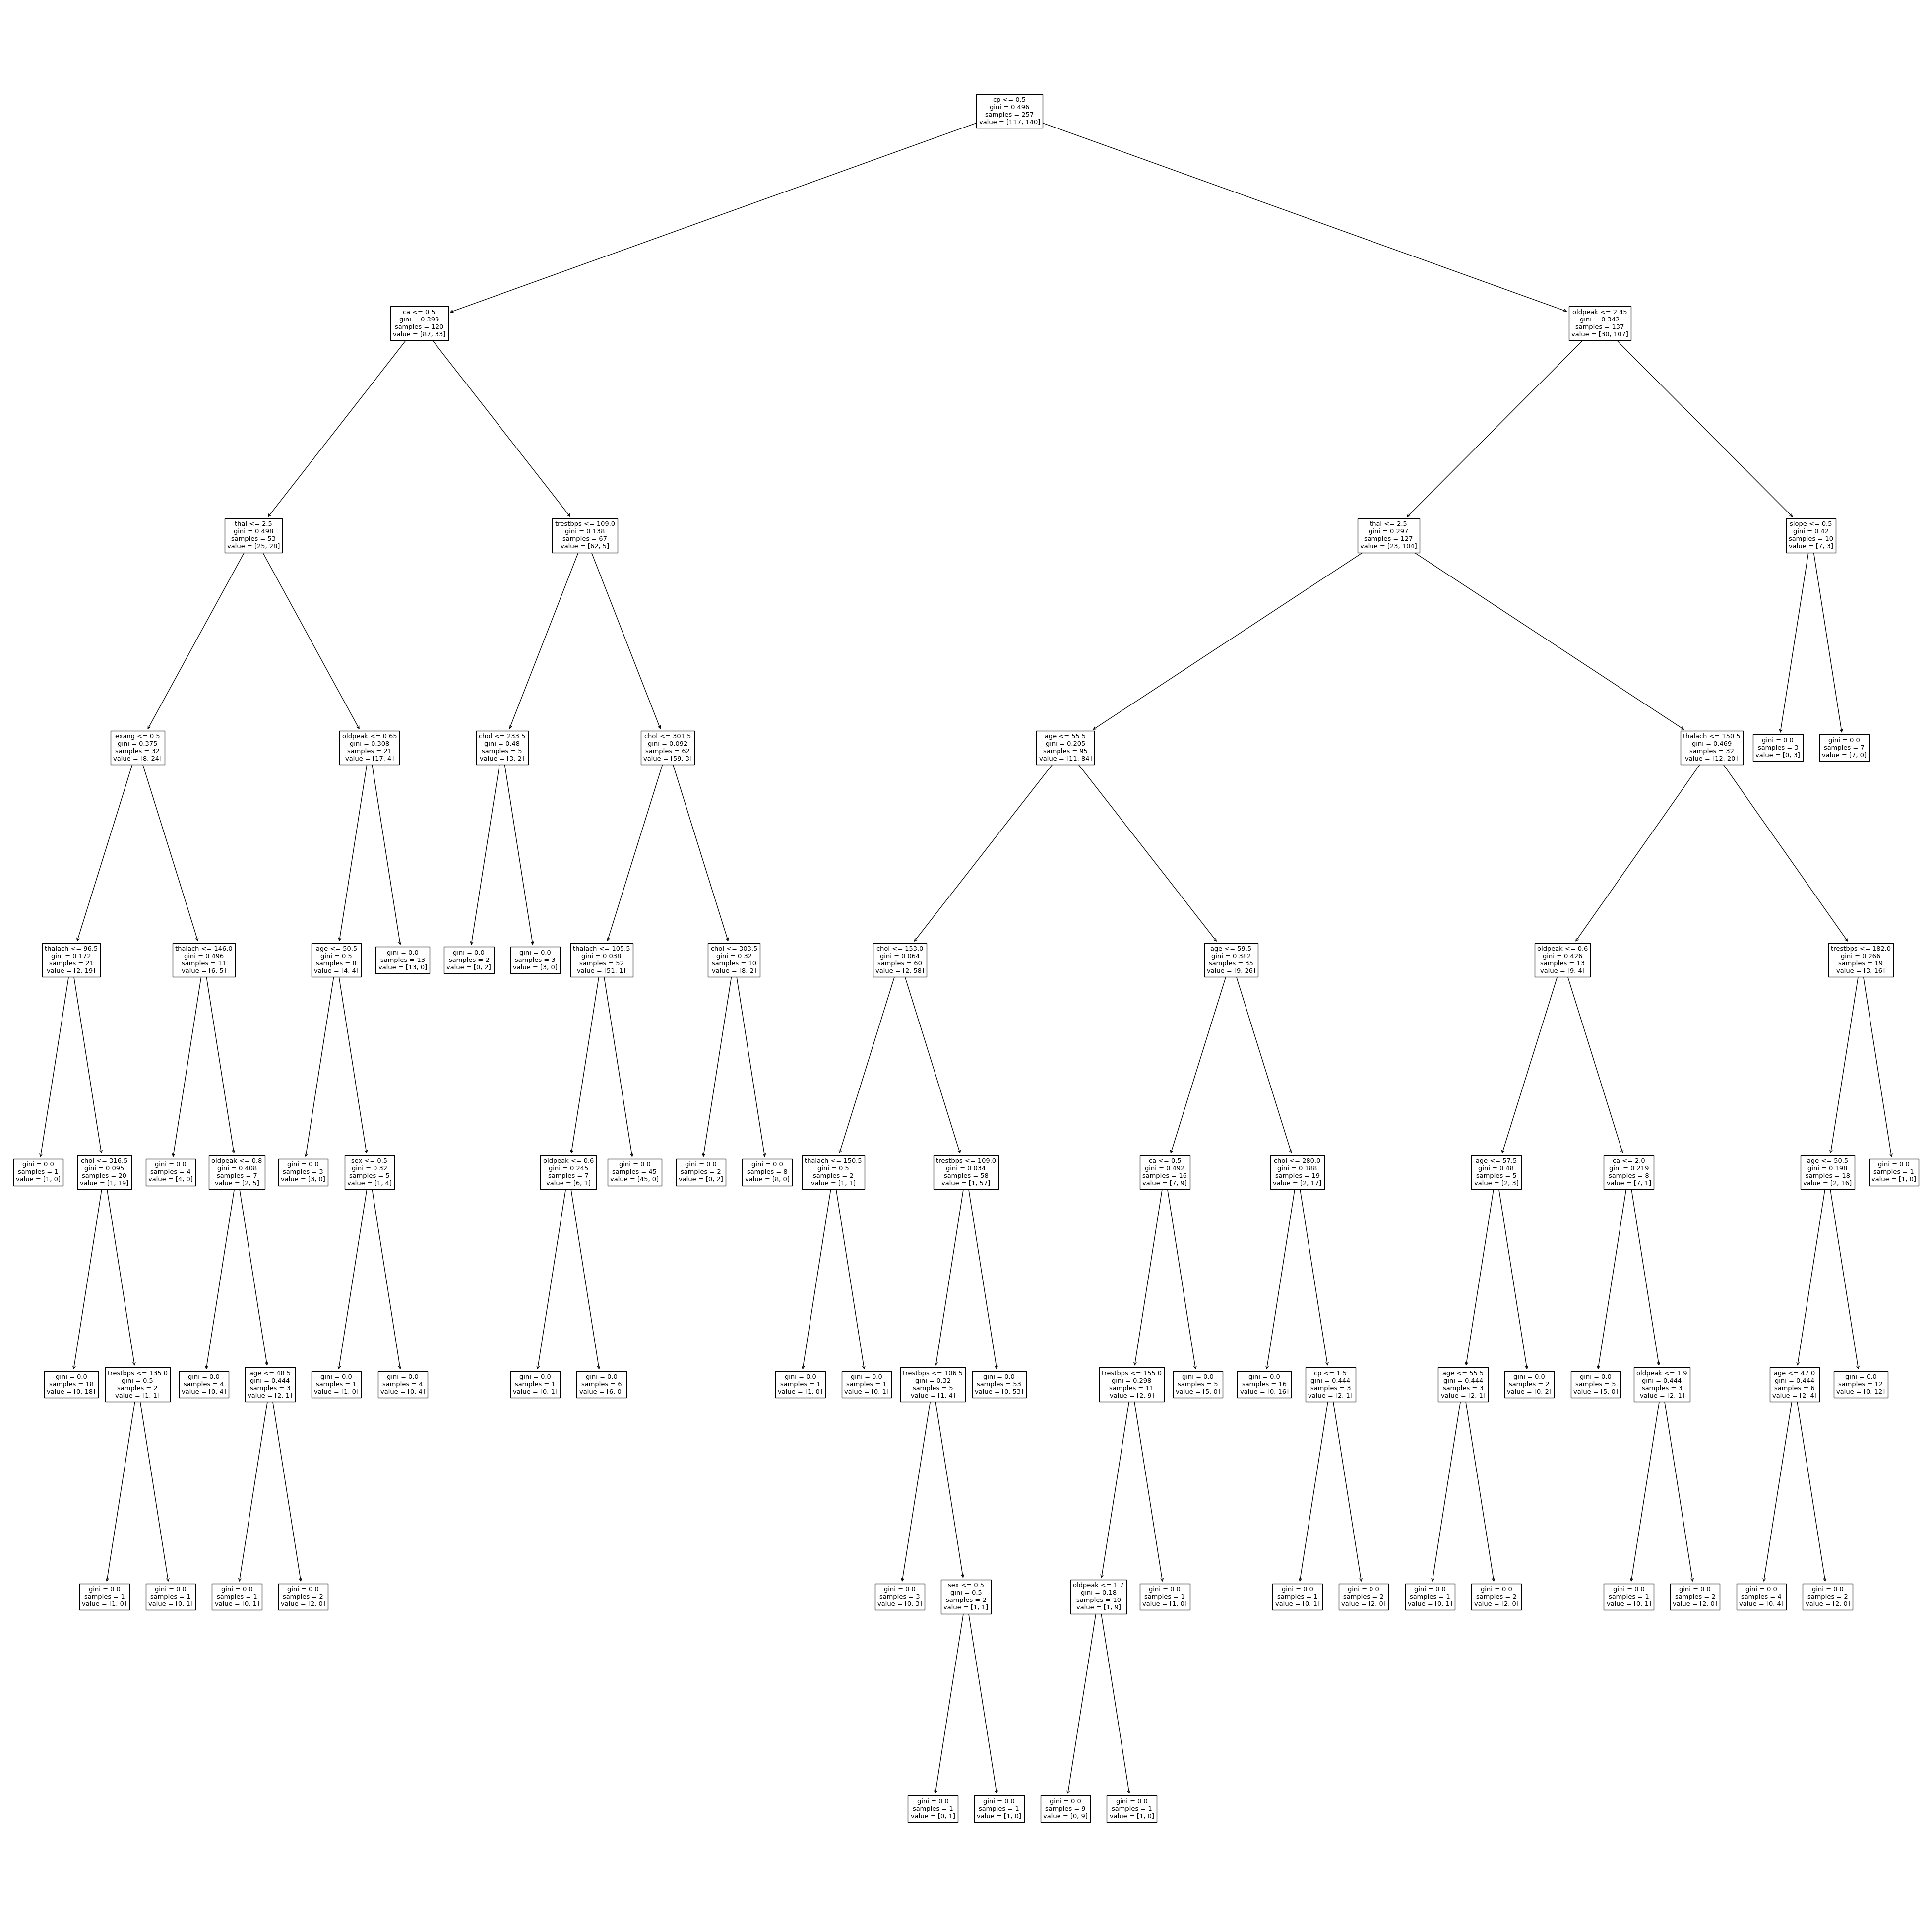

In [16]:
plt.figure(figsize=(50, 50))
plot_tree(dtree, feature_names=features, filled=False)
plt.show()

In [17]:
feature_imp_dtree = dtree.feature_importances_
feature_imp_dtree

array([0.10842408, 0.02039683, 0.26745601, 0.04769228, 0.07997832,
       0.        , 0.        , 0.07823445, 0.02295747, 0.11946345,
       0.03294872, 0.13493374, 0.08751465])

In [18]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [19]:
for imp, feat in zip(feature_imp_dtree, features):
    print(f'{feat}: {round(imp * 100 ,2)}%')

age: 10.84%
sex: 2.04%
cp: 26.75%
trestbps: 4.77%
chol: 8.0%
fbs: 0.0%
restecg: 0.0%
thalach: 7.82%
exang: 2.3%
oldpeak: 11.95%
slope: 3.29%
ca: 13.49%
thal: 8.75%


In [20]:
y_pred_dtree = dtree.predict(X_test)
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.91      0.80      0.85        25

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46



In [21]:
feature_imp_rand_forest = rand_forest.feature_importances_
for imp, feat in zip(feature_imp_rand_forest, features):
    print(f'{feat}: {round(imp * 100, 2)}%')

age: 8.8%
sex: 3.63%
cp: 14.0%
trestbps: 7.59%
chol: 8.31%
fbs: 1.35%
restecg: 2.26%
thalach: 11.31%
exang: 5.26%
oldpeak: 12.24%
slope: 4.27%
ca: 12.4%
thal: 8.57%


In [22]:
y_pred_rand_forest = rand_forest.predict(X_test)
print(classification_report(y_test, y_pred_rand_forest))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.86      0.96      0.91        25

    accuracy                           0.89        46
   macro avg       0.90      0.88      0.89        46
weighted avg       0.90      0.89      0.89        46



In [23]:
feature_imp_ada_boost = ada_boost.feature_importances_

for imp, feat in zip(feature_imp_ada_boost, features):
    print(f'{feat}: {round(imp * 100, 2)}%')

age: 22.0%
sex: 6.0%
cp: 4.0%
trestbps: 8.0%
chol: 12.0%
fbs: 0.0%
restecg: 2.0%
thalach: 18.0%
exang: 2.0%
oldpeak: 12.0%
slope: 4.0%
ca: 4.0%
thal: 6.0%


In [24]:
y_pred_ada = ada_boost.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.96      0.88      0.92        25

    accuracy                           0.91        46
   macro avg       0.91      0.92      0.91        46
weighted avg       0.92      0.91      0.91        46



In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic = LogisticRegression(n_jobs=-1)

In [27]:
logistic.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [28]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.83      0.96      0.89        25

    accuracy                           0.87        46
   macro avg       0.88      0.86      0.87        46
weighted avg       0.88      0.87      0.87        46



In [29]:
y_pred_proba = rand_forest.predict_proba(X_test)

In [30]:
y_pred_proba[:5]

array([[0.  , 1.  ],
       [0.21, 0.79],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [0.9 , 0.1 ]])

In [31]:
y_pred_rand_forest[:5]

array([1, 1, 0, 1, 0], dtype=int64)